# Iris Flower K-Nearest Neighbor Classification (KNN) with Scikit-Learn

## Author: Ana Lúcia da Cunha Cox (ana.c.cox@gmail.com)

### Goals
Apply the KNN classification model into Iris Flower dataset.

### Dataset
This dataset was downloaded on https://www.kaggle.com/uciml/iris. 

The Iris flower dataset is a multivariate dataset introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. The dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Based on Fisher's linear discriminant model, this data set became a typical test case for many statistical classification techniques in machine learning such as support vector machines. The dataset contains a set of 150 records under five attributes - sepal length, sepal width, petal length, petal width and species. For more details access: https://en.wikipedia.org/wiki/Iris_flower_data_set.

                            ------------------------------------------------------

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# 2. Import Datasets

In [2]:
iris = pd.read_csv("C:/Users/Ana Cox/aceleradev_ds/02. Meu material de aulas/Semana 02/Iris Flower KNN with Scikit-Learn/IRIS.csv")

## 2.1. Understanding the dataset

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

This dataset has 5 columns (4 of them are float64 and 1 object type) and 150 rows. There are no missing values.

## 2.2. Basic statistics 

#### Count
It is the total number of rows.

#### Mean
The "average" number; found by adding all data points and dividing by the number of data points.

#### Standard
The standard deviation is a measure of the amount of variation or dispersion of a set of values.

#### Min
It is the lowest value found in the database

#### 25%
The first quartile is essentially the 25th percentile; i.e 25% of the points in the data fall below that value.

#### 50%
The middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers).The line in the middle is the median value of the data. Median is used over the mean since it is more robust to outlier values. 

#### 75%
The third quartile is the 75th percentile; i.e 75% of the points in the data fall below that value.

#### Max
It is the highest value found in the database. 

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


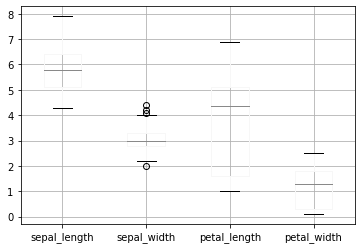

In [7]:
plt.figure()
iris.boxplot()
plt.show()

# 3. Data Visualization

#### How is the data distribution by species?

In [8]:
iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

## 3.1. Violin Plot

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high. 

For more information: https://en.wikipedia.org/wiki/Violin_plot#:~:text=A%20violin%20plot%20is%20a,by%20a%20kernel%20density%20estimator.

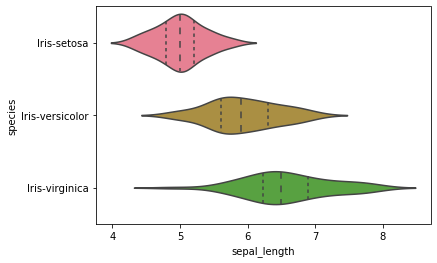

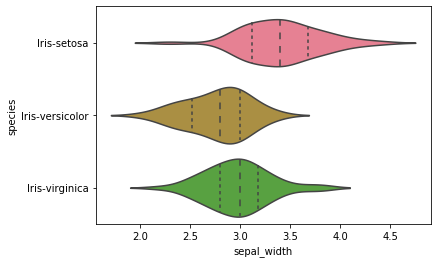

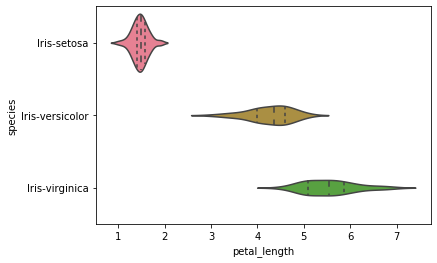

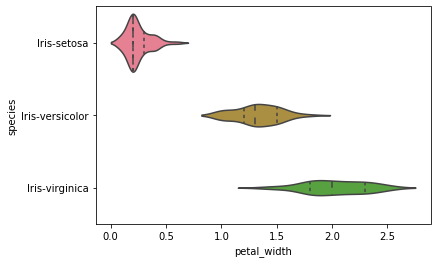

In [9]:
g = sns.violinplot(y='species', x='sepal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=iris, inner='quartile')
plt.show()

## 3.2. Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

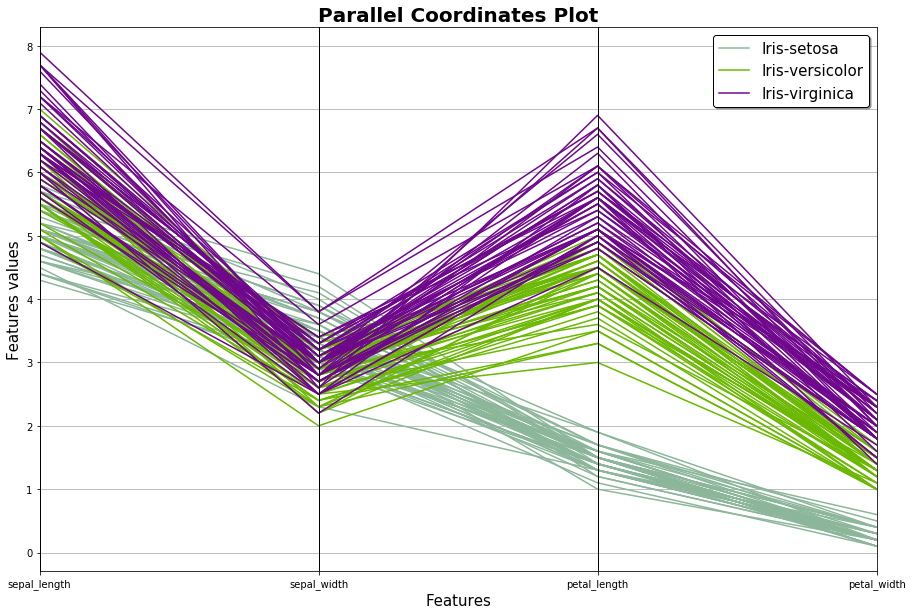

In [10]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(iris, "species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

## 3.3. Andrews Curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

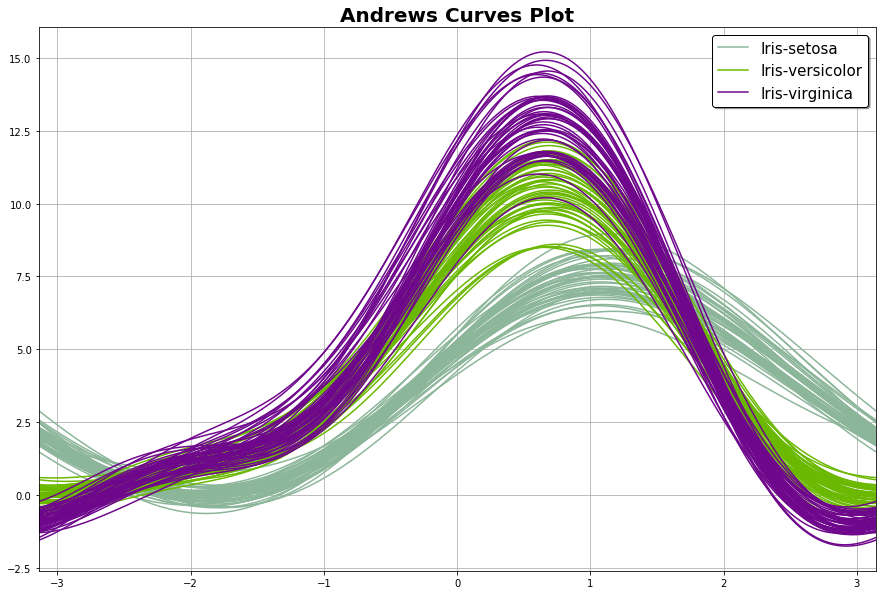

In [11]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(iris, "species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

## 3.4. Pairplot 

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

For more information: https://seaborn.pydata.org/generated/seaborn.pairplot.html

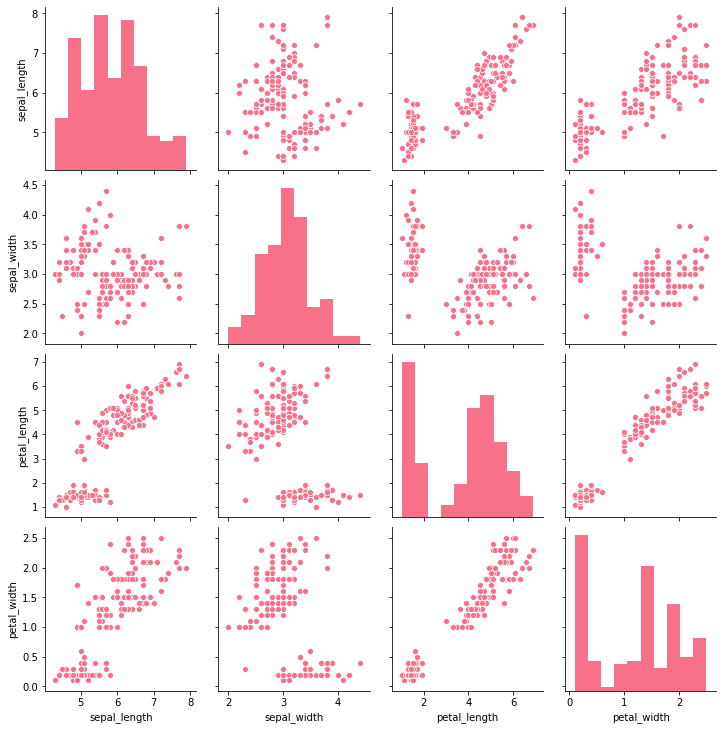

In [12]:
sns.pairplot(iris)

#### Different levels of a categorical variable by the color of plot elements 

In this case,it´s grouped by species

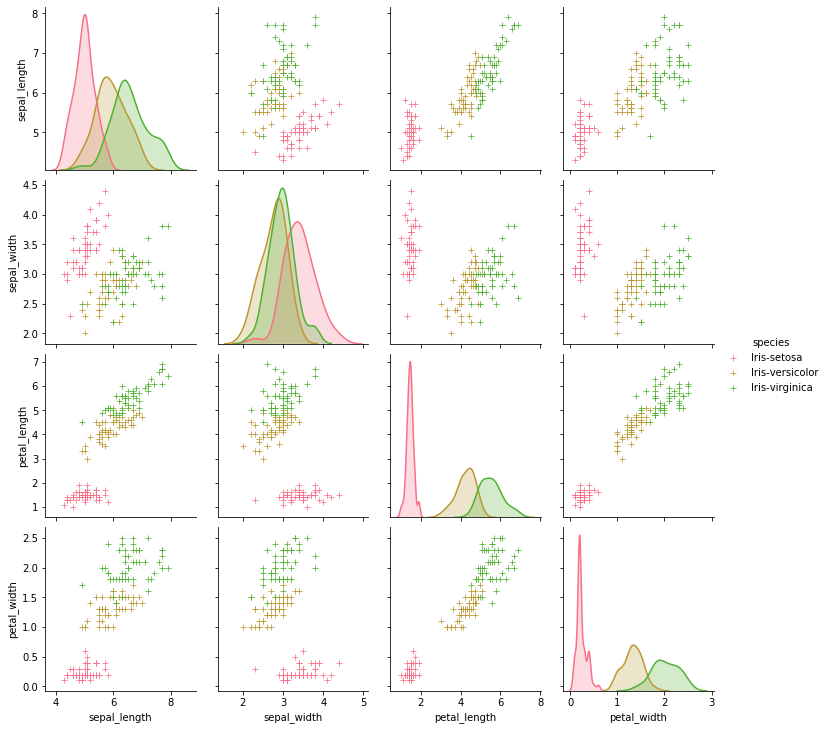

In [13]:
sns.pairplot(iris, hue='species', markers='+')
plt.show()

#### Different colors 

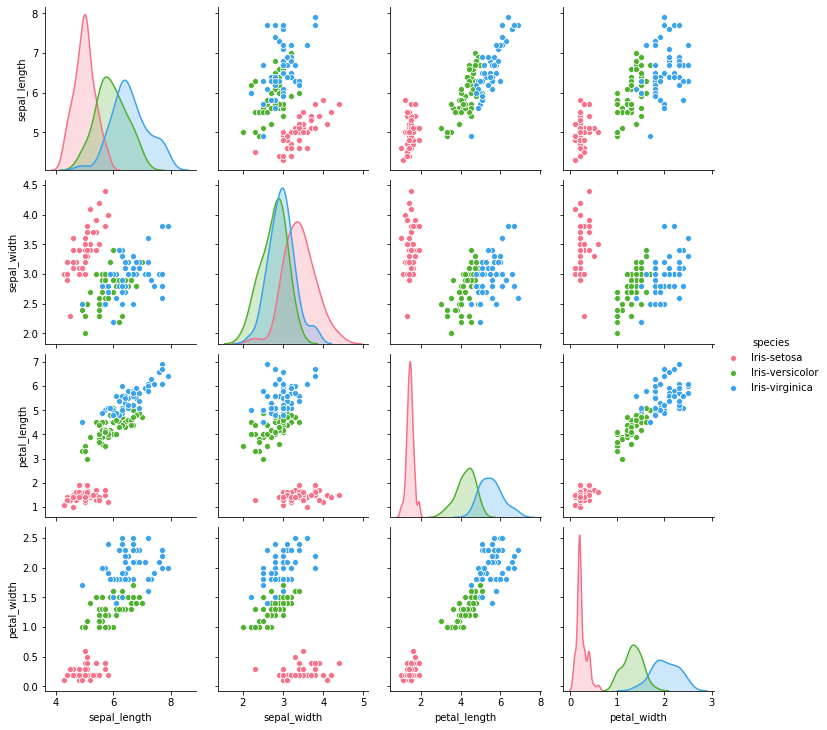

In [14]:
sns.pairplot(iris, hue="species", palette="husl")

## 3.5. Box-Plot 

A box plot is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum. The term "box plot" comes from the fact that the graph looks like a rectangle with lines extending from the top and bottom.

<Figure size 432x288 with 0 Axes>

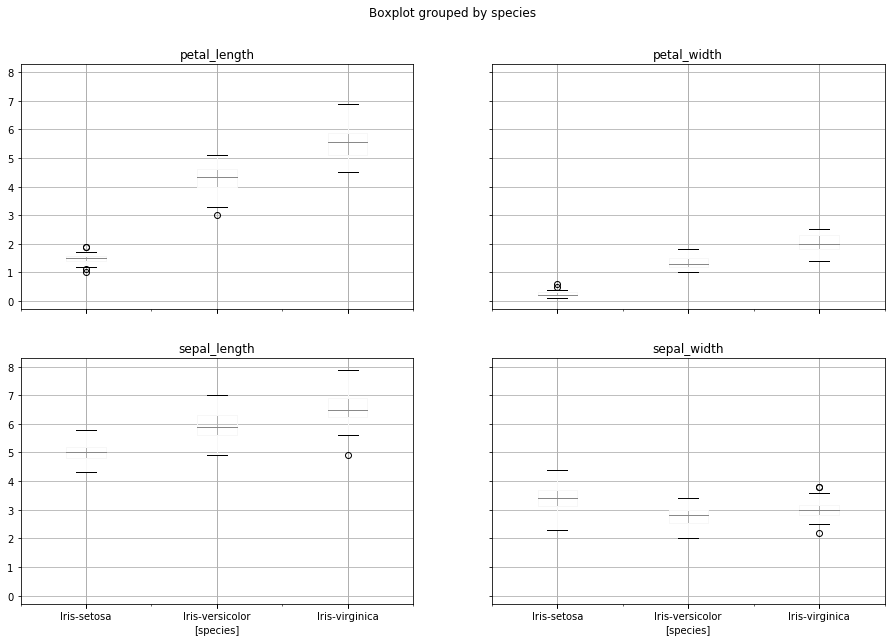

In [15]:
plt.figure()
iris.boxplot(by="species", figsize=(15, 10))
plt.show()

# 4. Data Modeling - Making predictions with KNN

https://scikit-learn.org/stable/modules/neighbors.html

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique. 		

https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

In [16]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = iris[feature_columns].values
y = iris['species'].values

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

## 4.1. Split the dataset into train and test

80% of the base will be used in the training base and 20% in the test base.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print('x_train shape: ' + str(x_train.shape))
print('x_test shape: ' + str(x_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

x_train shape: (120, 4)
x_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## 4.2. Fitting clasifier to the train dataset

####  Instantiate learning model (k = 3)

A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

In [19]:
classifier = KNeighborsClassifier(n_neighbors=3)

#### Fitting the model

In [20]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Predicting the Test set results 

In [21]:
y_pred = classifier.predict(x_test)

## 4.3. Evaluating predictions 

#### Confusion Matrix
It is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [22]:
confusionmatrix = confusion_matrix(y_test, y_pred)
confusionmatrix

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

#### Accuracy
It is the quality or state of being correct or precise.

https://developers.google.com/machine-learning/crash-course/classification/accuracy

In [23]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


## 4.4. Using cross-validation for parameter tuning

####  Create a list of K for KNN

In [24]:
k_list = list(range(1,50,2))

#### Create list of cv scores

In [25]:
cv_scores = []

#### Perform 10-fold cross validation 

In [26]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#### Change to misclassification error 

<Figure size 432x288 with 0 Axes>

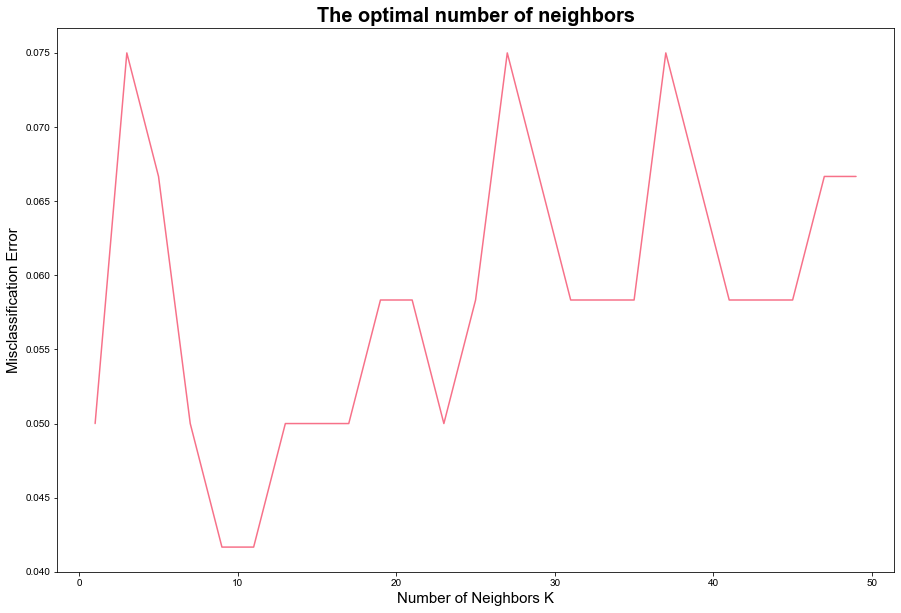

In [27]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

#### Find best k 

In [28]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


# 5. Additional Bibliography

MIT Lecture: https://www.youtube.com/watch?v=09mb78oiPkA

Iris dataset: https://www.kaggle.com/uciml/iris

Theory: http://www.scholarpedia.org/article/K-nearest_neighbor

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/

https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

https://www.saedsayad.com/k_nearest_neighbors.htm